# Data Analysis & Visualization with Python - Cat Survey (SOLUTION)

In [1]:
# load libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

## Data Exploration Pt I: Non-visual exploration

As you go through this, consider:
 * What is this data telling us?
 * What kinds of visuals would be suitable for this data? Why?
 * What kinds of visuals would not be suitable for this data? Why?
 * Why are these steps important to do before creating a visual?
 * What other non-visual information might you want to look at before creating a visual?

In [2]:
# import data
filePath = os.path.join("..", "data", "cats.csv")
df = pd.read_csv(filePath)

# preview data
df

,Respondent,Answer
0,1,Yes
1,2,Yes
2,3,Yes
3,4,No
4,5,No


In [3]:
# size and shape of data
print("Size: ", df.size)
print("Shape: ", df.shape)

Size:  10
Shape:  (5, 2)


In [4]:
# check data types
df.dtypes

Respondent     int64
Answer        object
dtype: object

In [5]:
# check for null values

# tells you if a null value exists in each column
# can also use newer version: df.isna().any()
print("Null Values\n", df.isnull().any(), "\n\n")

# tells you how many null values exist in each column
# can also use newer version: df.isna().sum()
print("Null/NaN Count\n", df.isnull().sum())

Null Values
 Respondent    False
Answer        False
dtype: bool 


Null/NaN Count
 Respondent    0
Answer        0
dtype: int64


## Data Exploration Pt II: Exploration using visuals

### Good visuals

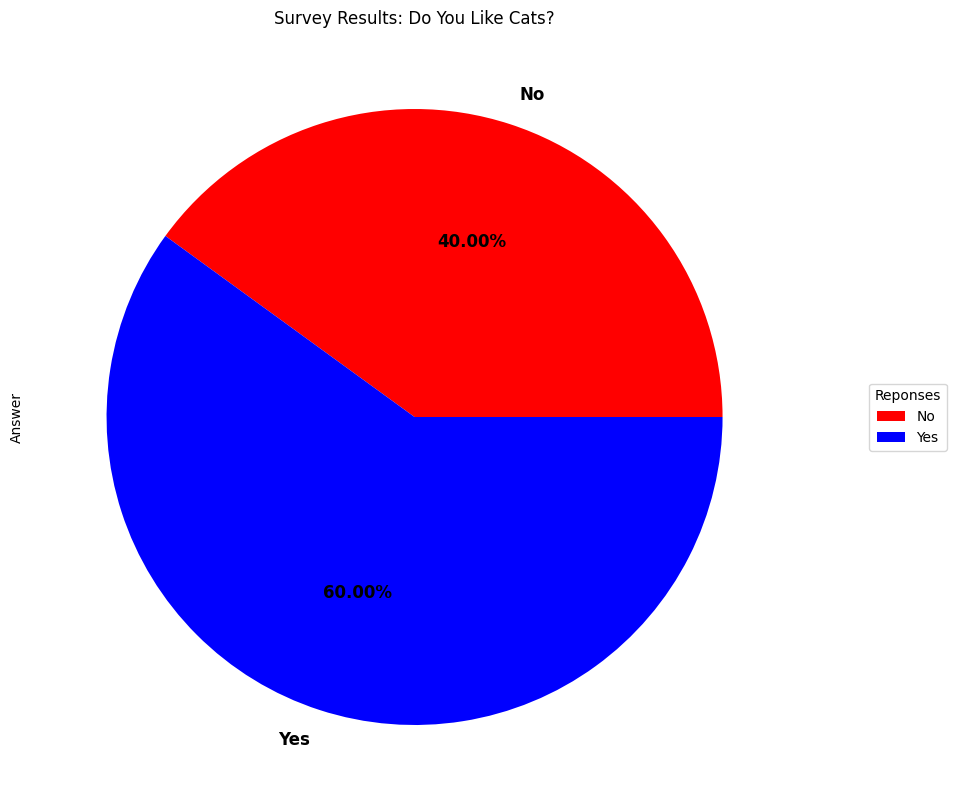

In [6]:
# pie chart using matplotlib

# pandas built-in visuals follow basic form of 'df.plot.[visual type]'

# if you want to know more about how this syntax works,
# see https://stackoverflow.com/questions/62534037/plotting-non-numerical-data-in-python
p_pie = (
    df.groupby("Answer")["Answer"]
    .count()
    .plot.pie(
        labels=["No", "Yes"],
        colors=["r", "b"],  # you can leave this out and colors will autoselect
        autopct="%.2f%%",
        textprops={
            "color": "black",
            "size": 12,
            "weight": "bold",
        },  # change text format - you can leave this out and will autoselect
        figsize=(10, 10),
    )
)
p_pie.legend(title="Reponses", loc="center right", bbox_to_anchor=(0.7, 0, 0.5, 1))
p_pie.set_title("Survey Results: Do You Like Cats?")

plt.show()

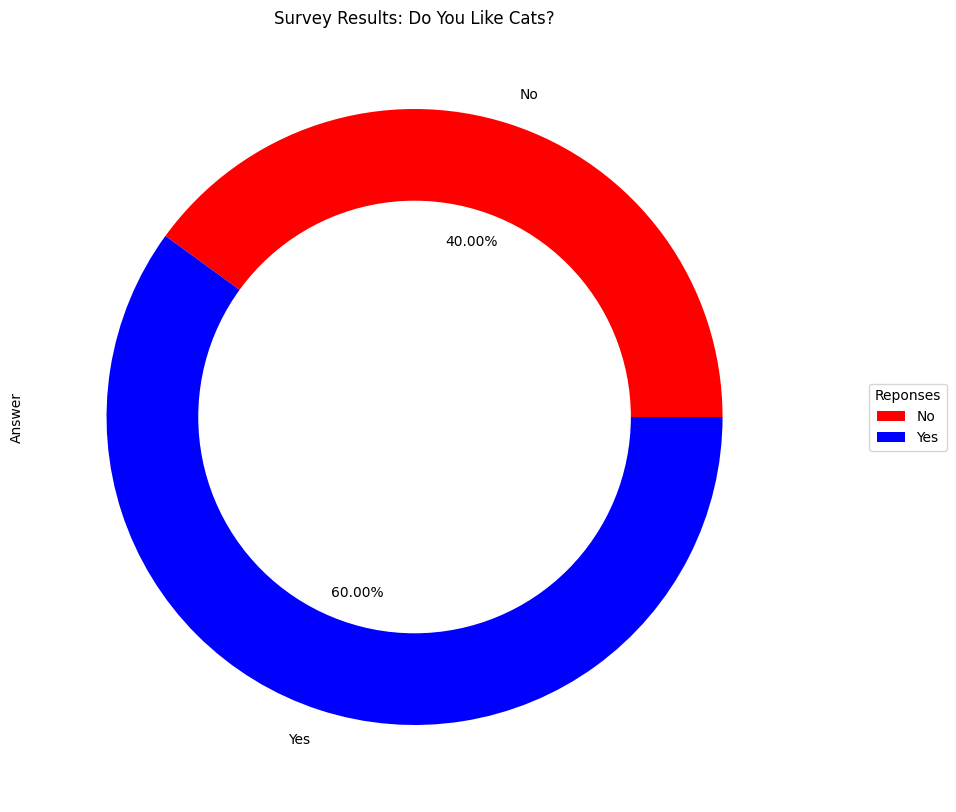

In [7]:
# donut chart using matplotlib

p_donut = (
    df.groupby("Answer")["Answer"]
    .count()
    .plot.pie(
        labels=["No", "Yes"],
        colors=["r", "b"],  # you can leave this out and colors will autoselect
        autopct="%.2f%%",
        figsize=(10, 10),
    )
)
p_donut.set_title("Survey Responses")
p_donut.legend(title="Reponses", loc="center right", bbox_to_anchor=(0.7, 0, 0.5, 1))
p_donut.set_title("Survey Results: Do You Like Cats?")

my_circle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

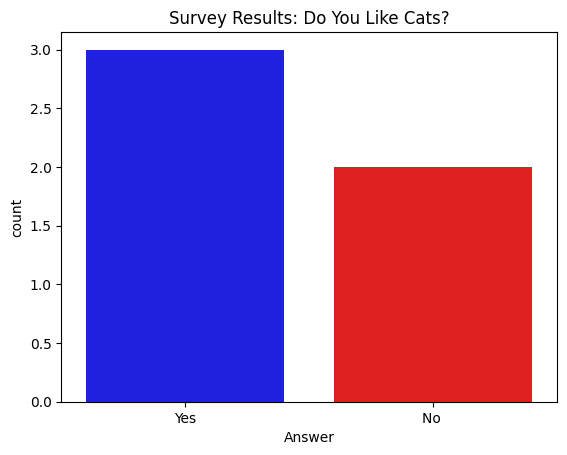

In [8]:
# count plot (similar to a column chart or horizontal bar chart, but for counts) using seaborn

s_count = sns.countplot(
	x=df["Answer"], 
	palette=["b", "r"]
).set_title("Survey Results: Do You Like Cats?")

plt.show()

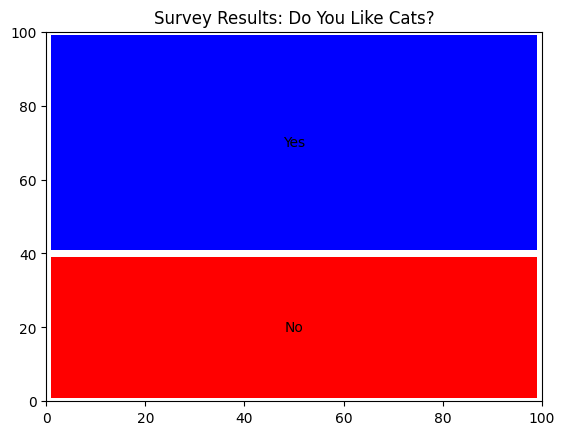

In [9]:
# treemap chart using squarify

tm = squarify.plot(
	df.groupby("Answer")["Answer"].count(),
	label=["No", "Yes"],
	color=["r", "b"],
	pad=0.25,
).set_title("Survey Results: Do You Like Cats?")

plt.show(tm)

### Now deliberately make a bad visual or two

[Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

Can change axis by [creating a break](https://matplotlib.org/2.0.2/examples/pylab_examples/broken_axis.html) or by starting the axis at a different place (e.g. plt.ylim(bottom, top))

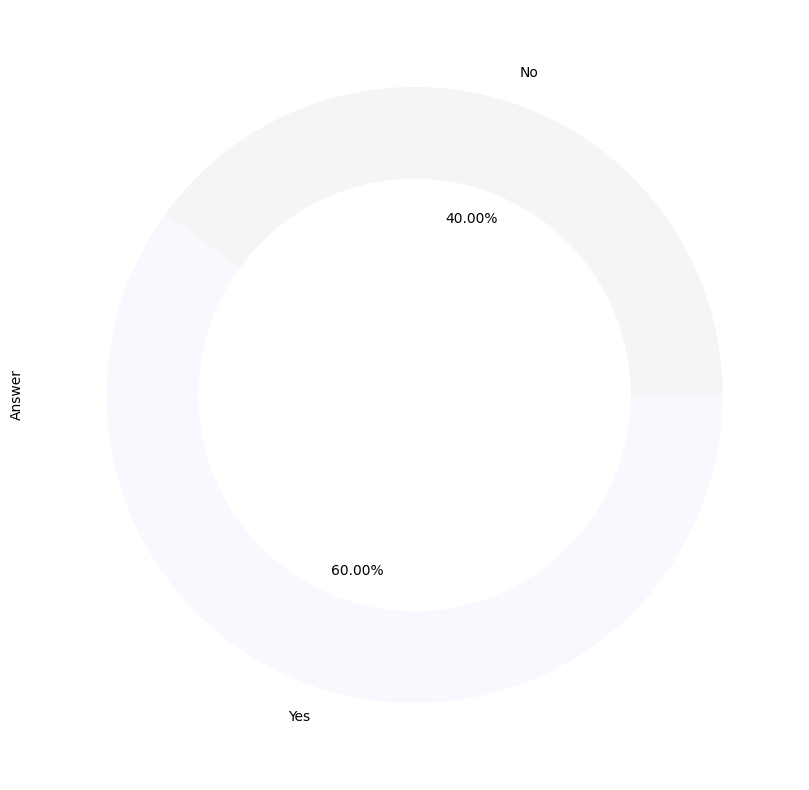

In [10]:
# Bad or missing titles, labels, ambiguous color palette, change/break in axis etc.

# donut chart using matplotlib

p_donut = (
    df.groupby("Answer")["Answer"]
    .count()
    .plot.pie(
        labels=["No", "Yes"],
        colors=[
            "whitesmoke",
            "ghostwhite",
        ],  # you can leave this out and colors will autoselect
        autopct="%.2f%%",
        figsize=(10, 10),
    )
)
# p_donut.set_title('Survey Responses')
# p_donut.legend(title = 'Reponses',
#             loc = 'center right',
#             bbox_to_anchor = (0.7,0,0.5,1))
# p_donut.set_title('Survey Results: Do You Like Cats?')

my_circle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

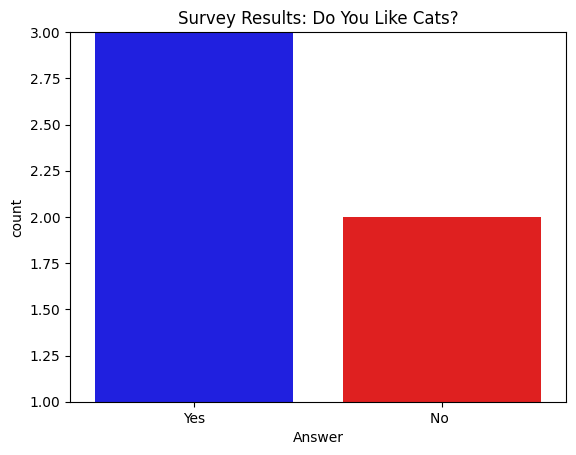

In [11]:
# Bad or missing titles, labels, ambiguous color palette, change/break in axis etc.

# count plot (similar to a column chart or horizontal bar chart, but for counts) using seaborn

# start y axis at 1 not zero - makes difference appear larger than it is
# looks like yes is twice as much as no but that's not actually the case
plt.ylim(1, 3)

s_count = sns.countplot(
	x=df["Answer"], 
	palette=["b", "r"]
).set_title("Survey Results: Do You Like Cats?")

plt.show()